In [1]:
# 주피터 노트북 환경설정
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

from IPython.display import Image

from IPython.core.display import display, HTML
# display(HTML("<style>.container { font-weight: bold !important; font-family:'Malgun Gothic' !important;}</style>"))
# display(HTML("<style>.container { font-weight: bold !important;}</style>"))
# display(HTML("<style>.container { width: 98% !important; }</style>"))

In [2]:
import numpy as np
import pandas as pd
import os

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
%matplotlib inline

# 관련 라이브러리 임포트 
import matplotlib.font_manager as fm

#  한글글꼴로 변경
# plt.rcParams['font.family'] = '한글글꼴명'
plt.rcParams['font.size'] = 11.0
# plt.rcParams['font.family'] = 'batang'
plt.rcParams['font.family'] = 'Malgun Gothic'

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False

# 그래프 기본 크기 설정 
plt.rcParams['figure.figsize'] = [10, 6]

# 군집화(Clustering)

- 비지도학습의 대표적인 기술로 x에 대한 레이블이 지정 되어있지 않은 데이터를 그룹핑하는 분석 알고리즘
- 데이터들의 특성을 고려해 데이터 집단(클러스터)을 정의하고 데이터 집단의 대표할 수 있는 중심점을 찾는 것으로 데이터 마이닝의 한 방법.
- 클러스터란 비슷한 특성을 가진 데이터들의 집단이며 반대로 데이터의 특성이 다르면 다른 클러스터에 속해야 한다. 

### 군집 알고리즘의 종류 

- K 평균  (K-Means)
    - 각 군집의 평균(mean)을 활용하여 K개의 군집으로 묶는다는 의미다. 여기서 평균(Means)이란 각 클러스터의 중심과 데이터들의 평균 거리를 의미한다
    - 특정한 임의의 지점을 선택해 해당 중심에 가장 가까운 포인트들을 선택하는 군집화기법.
    - 선택된 포인트의 평균지점으로 이동하고  이동된 중심점에서 다시 가까운 포인트를 선택,
        다시 중심점을 평균 지점으로 이동하는 프로세스를 반복적으로 수행 
    - 일반적으로 군집화에서 가장 많이 사용되는 알고리즘
    - 거리기반 알고리즘으로 속성의 개수가 매우 많을수록 군집화 정확도가 떨어짐
    
    <img src='https://media.vlpt.us/images/jhlee508/post/f5b48f20-25ac-4582-a65e-92783d91b877/image.png' width='500'>
    
    <img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Flr0M5%2FbtqGgxdBrBJ%2F8F7LMrETuqwVgj7sWyKhHk%2Fimg.png'>
    

- 평균이동(Mean Shift) 
    - K 평균과 유사하지만 거리 중심이 아니라 데이터가 모여있는 밀도가 가장 높은쪽으로 군집 중심점을 이동하면서 군집화를 수행함
    - 정형 데이터 세트보다 컴퓨터 비전 영역에서 이미지나 영상 데이터에서 특정 개체를 구분하거나 움직임을 추적하는데 역할을 수행하는 알고리즘
    - 데이터 세트의 형태를 특정 형태로 가정한다던가, 특정 분포도 기반의 모델로 가정하지 않기 때문에 좀 더 유연한 군집화 가능. 이상치의 영향력 크지 않음. 미리 군집의 개수 정할 필요 없음 
    
    <img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FAj0LE%2FbtqGg52g3fm%2FMKvz1DKBP0tmLoRdoAPA9K%2Fimg.png'>
    
    
- GMM(Gaussian Mixture Model)
    - 군집화를 적용하는 데이터가 여러개의 가우시안분포를 모델을 섞어서 생성된 모델로 가정해 수행하는 방식
    - Gaussian 분포가 여러 개 혼합된 clustering 알고리즘
    - 전체 데이터 세트는 서로 다른 정규분포를 가진 여러가지 확률 분포 곡선으로 구성되어 있으며, 정규분포에 기반에 군집화를 수행
    -  여러개의 정규 분포 곡선 추출 뒤, 개별 데이터가 이 중 어떤 정규분포에 속하는지 결정한다. 
        이러한 방식을 모수추정이라고 하며 "개별 정규 분포의 평균과 분산", 
        "각 데이터가 어떤 정규 분포에 해당되는지의 확률"을 구하기 위해서 추정한다 
        <img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile7.uf.tistory.com%2Fimage%2F99BC00385AC75F9A03072C'>
        
        
- DBSCAN
    - Density Based Spatial Clustering of Applications with Noise
    - 밀도 기반 군집화의 대표적 예
    - 데이터의 분포가 기하학적으로 복잡한 데이터 세트에도 효과적인 군집화가 가능 
    
    <img src ='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FeGhb0G%2FbtqGnHS7GKm%2FGza0SloJNeB38XEsjbu70K%2Fimg.png' width='500'>
    
  

# K-Means를 이용한 붓꽃(Iris) 데이터 셋 Clustering

```
KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=111)

n_clusters : 군집 갯수. 군집중심점의 갯수 
init : 초기 군집중심점. k-means++ 알고리즘이 알아서 처리 
max-iter : 최대반복횟수
labels : 데이터포인트가 속한 군집 중심점 레이블
cluster_centers : 각 군집중심점 좌표
```

In [3]:
from sklearn.datasets import load_iris
#라이브러리 임포트
from sklearn.cluster import KMeans

In [4]:
iris = load_iris()

df_iris = pd.DataFrame(data=iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
df_iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [5]:
#실제 타겟 y
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
#모델 생성
#init='k-means++' -> 중심점 생성 옵션
model_kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=111)

#군집 실행 
#X에 해당하는 데이터만 입력
model_kmeans.fit(df_iris)

#군집의 결과물 : 각 데이터에 해당하는 군집 중심점
model_kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [7]:
#메서드 모델명.predict(X 데이터)
#model_kmeans.labels_와 동일한 값
model_kmeans.predict(df_iris)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [8]:
#데이터프레임에 군집 결과 저장
df_iris['cluster'] = model_kmeans.labels_

In [9]:
df_iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,cluster
74,6.4,2.9,4.3,1.3,0
53,5.5,2.3,4.0,1.3,0
45,4.8,3.0,1.4,0.3,1
2,4.7,3.2,1.3,0.2,1
122,7.7,2.8,6.7,2.0,2


In [10]:
#실제 y값과 비교
df_iris['target'] = iris.target
df_iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,cluster,target
101,5.8,2.7,5.1,1.9,0,2
100,6.3,3.3,6.0,2.5,2,2
32,5.2,4.1,1.5,0.1,1,0
63,6.1,2.9,4.7,1.4,0,1
102,7.1,3.0,5.9,2.1,2,2


In [11]:
#실제 y_target, 군집결과 cluster 집계함수
#데이터프레임.groupby([컬럼1, 컬럼2, ...])[특정컬럼].count()
df_iris.groupby(['target','cluster'])['sepal_length'].count()

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64

In [12]:
df_iris.groupby(['target'])['sepal_length'].count()

target
0    50
1    50
2    50
Name: sepal_length, dtype: int64

In [13]:
#타겟값의 번호와 다를 수 있음
df_iris.groupby(['cluster'])['sepal_length'].count()

cluster
0    62
1    50
2    38
Name: sepal_length, dtype: int64

In [14]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## 데이터 차원축소

In [16]:
from sklearn.decomposition import PCA

#객체 생성
pca = PCA(n_components=2)

pca_transformed = pca.fit_transform(iris.data)

df_iris['pca_x'] = pca_transformed[:,0]
df_iris['pca_y'] = pca_transformed[:,1]
df_iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,cluster,target,pca_x,pca_y
0,5.1,3.5,1.4,0.2,1,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,1,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,1,0,-2.888991,-0.144949


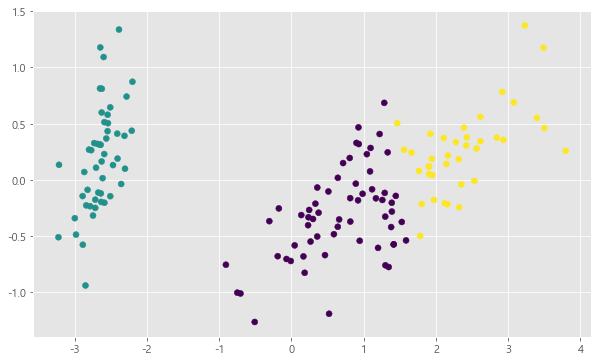

In [17]:
#matplot
plt.scatter(x=df_iris.loc[:, 'pca_x'], y=df_iris.loc[:, 'pca_y'], c=df_iris['cluster']);

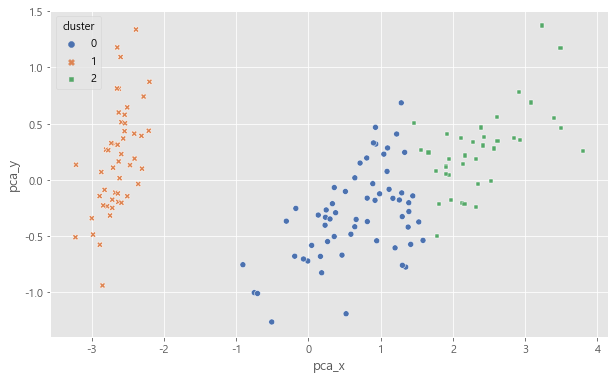

In [18]:
#seaborn -> 최종 군집 라벨 기준
sns.scatterplot(x='pca_x', y='pca_y', data=df_iris, hue='cluster', style='cluster', palette='deep');

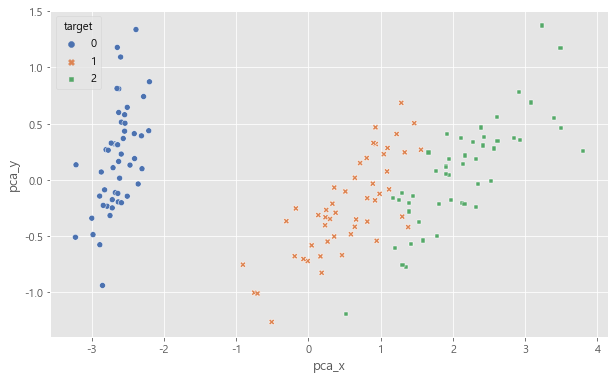

In [19]:
#seaborn -> 원본 데이터 라벨 기준
sns.scatterplot(x='pca_x', y='pca_y', data=df_iris, hue='target', style='target', palette='deep');

## 군집화 데이타셋 활용

make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=111)

- n_samples: 총 데이터의 개수. default=100
- n_features: 데이터의 피처 갯수, 시각화를 필요로 한다면 주로 2개, x 좌표, y 좌표
- centers: 정수형이면 군집수. ndarray 형태로 표현할 경우 개별 군 집 중심점의 좌표.
- cluster_std: 생성 군집 데이터의 표준 편차. 군집 내의 데이터가 표준편차 ? 로 생성 
   [0.8, 1,2, 0.6]과 같은 형태로 표현되면 3개의 군집에서 첫 번째 군집 내 데이터의 표준편차는 0.8, 두 번째 군집 내 데이터의 표준 편차는 1.2, 세 번째 군집 내 데이터의 표준편차는 0.6으로 정의 
- center_box : 생성 클러스터의 bounding box, (-10,10) 디폴트 

In [20]:
#군집용 데이터셋 생성 메서드 임포트
from sklearn.datasets import make_blobs

In [21]:
#3개 그룹, 2개 피처, 전체 개수 200개
#cluster_std -> 수치 작아질수록 군집끼리 뭉쳐짐
X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=111)
print(X.shape, y.shape)

(200, 2) (200,)


In [22]:
#y 타겟 라벨 분포 확인
unique, counts = np.unique(y, return_counts=True)
unique,counts

(array([0, 1, 2]), array([67, 67, 66], dtype=int64))

In [23]:
#데이터프레임화
df_cluster = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])

#타겟 y 라벨 추가
df_cluster['target'] = y
df_cluster.sample(5)

,ftr1,ftr2,target
112,-3.750357,-6.937905,2
23,2.784565,-7.460404,0
46,-3.702899,-7.130919,2
151,2.117104,-6.908967,0
11,-2.900454,5.961460,1


<AxesSubplot:xlabel='ftr1', ylabel='ftr2'>

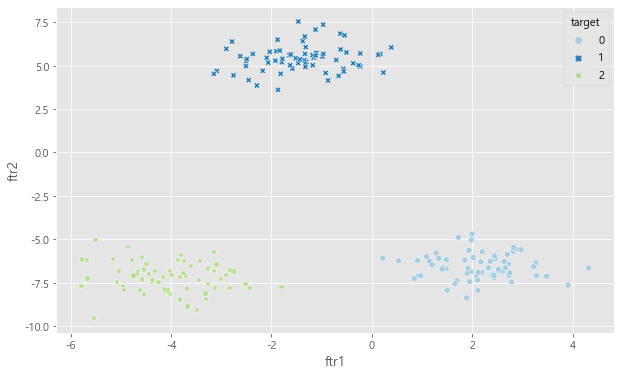

In [24]:
#샘플 데이터셋 시각화
sns.color_palette("Paired")
sns.scatterplot(x='ftr1', y='ftr2', data=df_cluster, hue='target', style='target', palette='Paired')

In [25]:
# 첫번째 스타일 
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)

# # 군집 실행 
# # X 에 해당하는 데이타만 입력 
model_kmeans.fit(X)

# # 군집 결과 : 각 데이타에 해당하는 군집 중심점 
# # 모델명.labels_
model_kmeans.labels_

model_kmeans.predict(X)

array([0, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2,
       2, 0, 0, 0, 0, 1, 1, 0, 2, 0, 1, 2, 1, 2, 1, 0, 0, 0, 0, 2, 1, 0,
       0, 0, 2, 1, 2, 0, 0, 1, 1, 1, 1, 2, 2, 2, 1, 2, 0, 0, 2, 0, 2, 0,
       2, 2, 1, 0, 0, 1, 0, 0, 2, 1, 2, 1, 0, 2, 0, 0, 1, 2, 0, 0, 1, 2,
       1, 0, 2, 0, 1, 1, 1, 2, 0, 0, 2, 1, 0, 1, 1, 0, 1, 0, 0, 1, 2, 2,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 0, 0, 2, 0, 1, 2, 1, 2, 0, 1, 0,
       1, 1, 0, 1, 2, 1, 2, 2, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2, 0, 0, 2,
       1, 0, 2, 2, 1, 1, 2, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       0, 2, 1, 0, 0, 2, 1, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2, 1, 2, 0, 2, 1,
       0, 0])

In [26]:
from sklearn.metrics import f1_score

In [32]:
f1_score(y, model_kmeans.predict(X), average= 'macro')

1.0

In [33]:
#두 번째 스타일
#군집화 모델 생성 및 적용
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)

#적용과 동시에 결과값 저장
cluster_labels = kmeans.fit_predict(X)

#데이터프레임에 추가
df_cluster['kmeans_label']  = cluster_labels

df_cluster.sample(5)

,ftr1,ftr2,target,kmeans_label
69,0.216792,-6.097046,0,2
195,2.104892,-7.359092,0,2
32,-2.290505,3.852969,1,0
150,-3.302203,-8.446609,2,1
23,2.784565,-7.460404,0,2


In [35]:
#군집 중심점에 대한 X 데이터
centers = kmeans.cluster_centers_
centers

array([[-1.41250635,  5.41684069],
       [-4.07439941, -7.21156843],
       [ 2.12255262, -6.56116653]])

In [36]:
#실제 y 라벨과 군집 결과의 라벨 분포 확인
df_cluster.groupby('target')['kmeans_label'].value_counts()

target  kmeans_label
0       2               67
1       0               67
2       1               66
Name: kmeans_label, dtype: int64

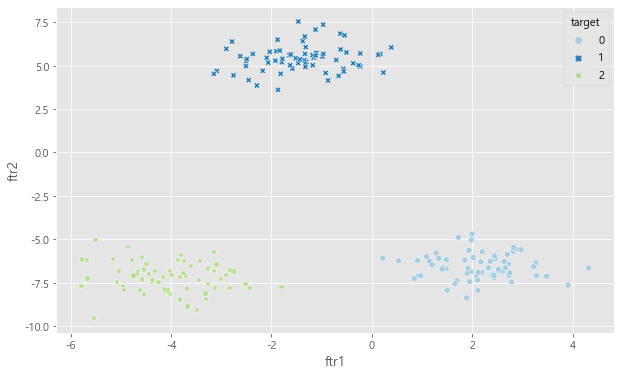

In [37]:
#실제 y라벨을 이용한 시각화
sns.scatterplot(x='ftr1', y='ftr2', data=df_cluster, hue='target', style='target', palette='Paired');

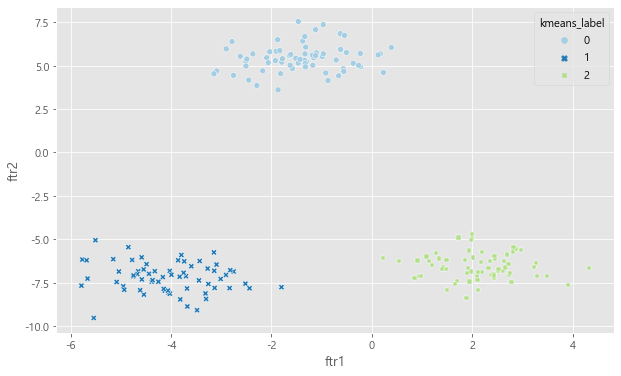

In [38]:
#군집 라벨을 이용한 시각화
sns.scatterplot(x='ftr1', y='ftr2', data=df_cluster, hue='kmeans_label', style='kmeans_label', palette='Paired');

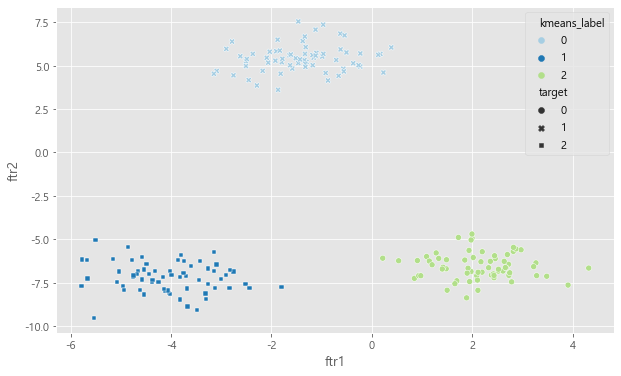

In [39]:
#동시에 확인
sns.scatterplot(x='ftr1', y='ftr2', data=df_cluster, hue='kmeans_label', style='target', palette='Paired');

# 군집 평가 - 실루엣 계수 

- 각 군집 간의 거리가 얼마나 효율적으로 분리 돼있는지를 나타낸다. 효율적으로 잘 분리 됐다는 것은 다른 군집과의 거리는 떨어져 있고 동일 군집끼리의 데이터는 서로 가깝게 잘 뭉쳐 있다는 의미이다. 군집화가 잘 될 수록 개별 군집은 비슷한 정도의 여우 공간을 가지고 떨어져 있을 것이다.
- 실루엣 계수는 개별 데이터가 가지는 군집화 지표로 해당 데이터가 같은 군집 내의 데이터와 얼마나 가깝게 군집화 돼있고, 다른 군집에 있는 데이터와는 얼마나 멀리 분리돼 있는지를 나타내는 지표이다 .

- a(i) : 특정 데이터 포인트의 실루엣 계수 값은 해당 데이터 포인트와 같은 군집 내에 있는 다른 데이터 포인트와의 거리를 평균한 값

- b(i) : 해당 데이터 포인트가 속하지 않은 군집 중 가장 가까운 군집과의 평균 거리

- 두 군집 간의 거리 값은 b(i) - a(i) 이며 이 값을 정규화 하기 위해 Max(a(i),b(i)) 값으로 나눈다. 따라서 i 번째 데이터 포인트의 실루엣 계수 값 s(i) 는 다음과 같이 정의된다.

<img src='https://t1.daumcdn.net/cfile/tistory/99BC644B5F4346CA10'>

- 실루엣 계수는 -1 에서 1사이의 값을 가지며, 1로 가까워 질수록 근처의 군집과 더 멀리 떨어져 있다는 것이고, 0에 가까울 수록 근처의 군집과 가까워 진다는 의미이다.

## 성능이 좋은 군집의 특징 

- 전체 실루엣 계수의 평균값, 즉 사이킷런의 silhouette_score() 값은 0~1 사이의 값을 가지며, 1에 가까울 수록 좋다.

- 전체 실루엣 계수의 평균값과 더불어 개별 군집의 평균값의 편차가 작아야한다. 즉 개별 군집의 실루엣 계수 평균값이 전체 실루엣 계수의 평균값에서 크게 벗어나지 않는 것이 중요하다.

- 전체 실루엣 계수의 평균값은 높지만, 특정 군집의 실루엣 계수 평균값만 유난히 높고 다른 군집들의 실루엣 계수 평균값은 낮으면 좋은 군집화가 아니다.


## 사이킷런의 실루엣 분석 관련 메서드
```
sklearn.metrics.silhouette_samples(X, labels, metric=’euclidean’, **kwds) 

sklearn.metrics.silhouette_score(X, labels, metric=’euclidean’, smaple_szie = None, **kwds) 

값이 높을수록 군집화가 어느정도 잘 됐다고 판단할 수 있다. (절대적인 기준이 될 수는 없다.)
```

## 붓꽃(Iris) 데이터 셋을 이용한 클러스터 평가

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

#군집 평가 메서드 추가 / samples의 평균값이 score
from sklearn.metrics import silhouette_samples, silhouette_score

In [41]:
from sklearn.datasets import load_iris

iris = load_iris()

df_iris = pd.DataFrame(data=iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
df_iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


```
KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=111)

n_clusters : 군집 갯수. 군집중심점의 갯수 
init : 초기 군집중심점. k-means++ 알고리즘이 알아서 처리 
max-iter : 최대반복횟수
labels : 데이터포인트가 속한 군집 중심점 레이블
cluster_centers : 각 군집중심점 좌표
```

In [42]:
#군집 실행
model_kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=111)
model_kmeans.fit(df_iris)
model_kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [43]:
model_kmeans.predict(df_iris)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [44]:
#군집 결과 라벨 추가
df_iris['cluster'] = model_kmeans.labels_

In [45]:
#차원 축소
from sklearn.decomposition import PCA

#스케일링
#적용 fit() -> 변형 transform()
#적용+변형 -> fit_transform()
iris_scaled = StandardScaler().fit_transform(iris.data)
# print(iris_scaled)

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

df_iris['pca_x'] = pca_transformed[:,0]
df_iris['pca_y'] = pca_transformed[:,1]

In [46]:
df_iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,1,-2.888991,-0.144949


## 실루엣 계수

인자로 X feature 데이터 셋과 각 피처 데이터 셋이 속한 군집 레이블 값인 labels 데이터를 입력해주면 
각 데이터 포인트의 실루엣 계수를 계산해 반환한다.

```
from sklearn.metrics import silhouette_samples, silhouette_score

silhouette_samples(Xdata, clusterData)

```

In [47]:
df_iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'cluster',
       'pca_x', 'pca_y'],
      dtype='object')

In [48]:
#실루엣 계수 구하기
#silhouette_samples(x, clusterLabel)

score_samples = silhouette_samples(iris.data,df_iris['cluster'])
#score_samples = silhouette_samples(df_iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], df_iris['cluster'])
score_samples[:5]

array([0.85295506, 0.81549476, 0.8293151 , 0.80501395, 0.8493016 ])

In [49]:
score_samples[:5]

array([0.85295506, 0.81549476, 0.8293151 , 0.80501395, 0.8493016 ])

In [50]:
#데이터프레임에 실루엣 계수 추가
df_iris['silhouette_coeff'] = score_samples

df_iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,cluster,pca_x,pca_y,silhouette_coeff
128,6.4,2.8,5.6,2.1,2,2.123609,-0.209729,0.454343
10,5.4,3.7,1.5,0.2,1,-2.506947,0.645069,0.803103
124,6.7,3.3,5.7,2.1,2,2.275431,0.334991,0.580154
70,5.9,3.2,4.8,1.8,0,1.116283,-0.084617,0.329095
4,5.0,3.6,1.4,0.2,1,-2.728717,0.326755,0.849302


In [51]:
#실루엣 계수 스코어
#silhouette_score = silhouette_score(df_iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], df_iris['cluster'])
silhouette_score(iris.data, df_iris['cluster'])

0.5528190123564093

In [52]:
#실루엣 계수 평균
df_iris['silhouette_coeff'].mean()

0.5528190123564093

<AxesSubplot:>

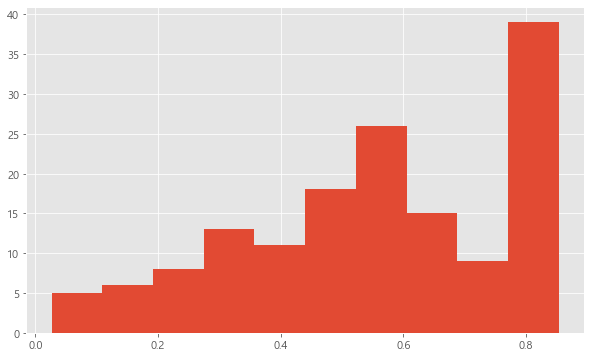

In [53]:
df_iris['silhouette_coeff'].hist()

In [54]:
#군집별 실루엣 계수 평균
df_iris.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

<AxesSubplot:xlabel='pca_x', ylabel='pca_y'>

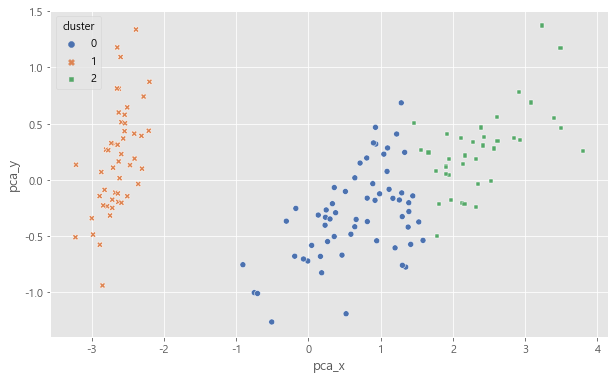

In [55]:
# seaborn 결과 : 군집 최종 라벨 기준 
sns.scatterplot(x='pca_x', y='pca_y', data=df_iris, hue='cluster', style='cluster', palette='deep')

## 클러스터별 평균 실루엣 계수의 시각화를 통한 클러스터 개수 최적화 방법

In [ ]:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
# 실루엣계수값들이 어떻게 분포되어있는지 샘플 예제 

In [56]:
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    for ind, n_cluster in enumerate(cluster_lists):
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

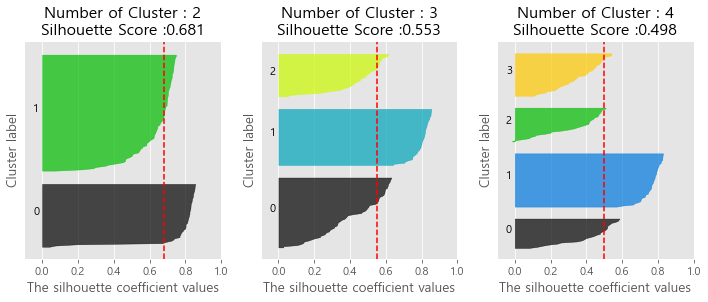

In [57]:
from sklearn.datasets import load_iris

iris=load_iris()
visualize_silhouette([ 2, 3, 4], iris.data)

## make_blobs 를 이용하여 예제 생성 후 군집 시각화

In [58]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, \
                  center_box=(-10.0, 10.0), shuffle=True, random_state=1)  

# 데이타프레임화 
df_cluster = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])

# 타겟 y 라벨 추가 
df_cluster['target'] = y

df_cluster.sample(5)

,ftr1,ftr2,target
64,-1.373973,5.291631,0
170,-8.526286,-8.669576,2
447,-10.234149,-3.225535,1
346,0.245099,5.517547,0
141,-8.852795,-7.791381,2


In [59]:
df_cluster['target'].value_counts()

0    125
1    125
2    125
3    125
Name: target, dtype: int64

<AxesSubplot:xlabel='ftr1', ylabel='ftr2'>

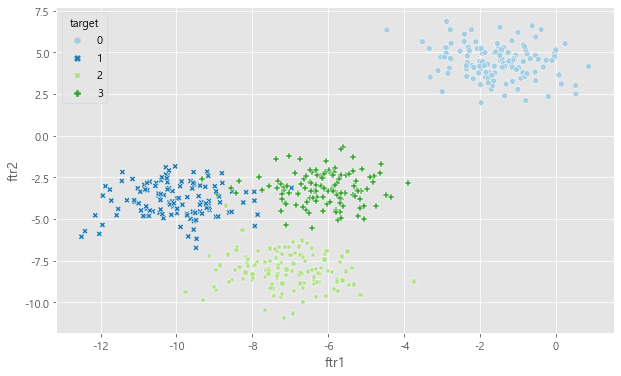

In [60]:
#샘플 데이타셋 시각화 
sns.scatterplot(x='ftr1', y='ftr2', data=df_cluster, hue='target', style='target', palette='Paired')

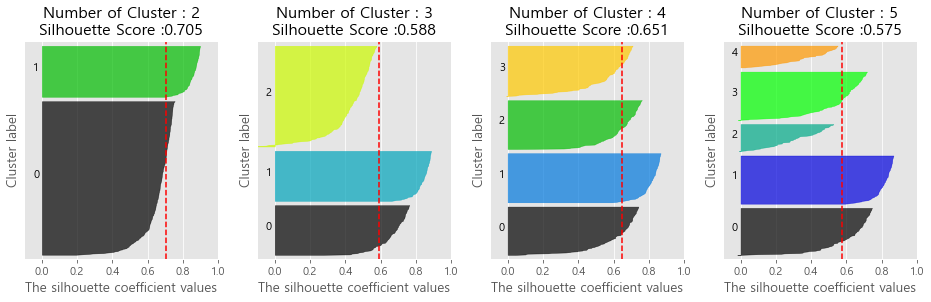

In [61]:
#각 실루엣 계수 확인 및 시각화
visualize_silhouette([ 2, 3, 4, 5], X)

# DBSCAN 

- 밀도 기반의 대표적인 알고리즘
- 간단하고 직관적인 알고리즘으로 돼있음에도 데이터의 분포가 기하학적으로 복잡한 데이터 셋에도 효과적인 군집화가 가능하다.
- 특정 공간 내에 데이터 밀도 차이를 기반알고리즘으로 하고 있어서 복잡한 기하하적 분포도를 가진 데이터 셋에 대해서도 군집화를 잘 수행한다.


<img src='https://t1.daumcdn.net/cfile/tistory/993AD64B5F4356EA22' width=400>


<img src='https://t1.daumcdn.net/cfile/tistory/9914FB3C5F4357281A' width=250>

- 점을 중심으로 epsilon 반경내에 minPts 이상수의 점이 있으면 그 점을 중심으로 군집이 되고 그 점을 core point라고 한다.Core point 가 서로 다른 core point의 군집의 일부가 되면 그 군집을 서로 연결되어 있다고 하고 하나의 군집으로 연결을 한다.군집에는 속하지만, 스스로 core point가 안되는 점을 border point라고 하고, 주로 클러스터의 외곽을 이루는 점이 된다.

## DBSCAN  – 붓꽃 데이터 셋

In [64]:
from sklearn.datasets import load_iris

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

iris_df = pd.DataFrame(data=iris.data, columns=feature_names)
iris_df['target'] = iris.target
iris_df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,target
18,5.7,3.8,1.7,0.3,0
28,5.2,3.4,1.4,0.2,0
127,6.1,3.0,4.9,1.8,2
60,5.0,2.0,3.5,1.0,1
111,6.4,2.7,5.3,1.9,2


## DBSCAN 군집화 적용

- eps : 입실론 주변 영역(epilon). 개별 데이터를 중심으로 입실론 반경을 가지는 원형의 영역
- min_samples : 최소 데이터 개수(min points). 개별 데이터의 입실론 주변 영역에 포함되는 데이터의 개수.

```
from sklearn.cluster import DBSCAN

dbsan = DBSCAN(eps = 0.6, min_samples = 8, metrics = "euclidean")
dbscan_labels = dbscan.fit_predict(iris.data)
```



In [65]:
#관련 메서드 임포트
from sklearn.cluster import DBSCAN

#군집 모델 생성 및 적용 -> 군집라벨(모델명.fit_predict(X))
#eps 값이 줄어들면 노이즈 포인트가 늘어남
dbscan = DBSCAN(eps=0.6, min_samples=12)
dbscan_labels = dbscan.fit_predict(iris.data)

#데이터프레임 추가
iris_df['dbscan_cluster'] = dbscan_labels

#결과 확인
iris_result = iris_df.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)
#-1 -> 노이즈 포인트
#KMeans보다는 좀 떨어짐

target  dbscan_cluster
0        0                48
        -1                 2
1        1                46
        -1                 4
2        1                38
        -1                12
Name: dbscan_cluster, dtype: int64


In [66]:
iris_df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,target,dbscan_cluster
115,6.4,3.2,5.3,2.3,2,1
5,5.4,3.9,1.7,0.4,0,0
102,7.1,3.0,5.9,2.1,2,1
128,6.4,2.8,5.6,2.1,2,1
97,6.2,2.9,4.3,1.3,1,1


In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

iris_scaled = StandardScaler().fit_transform(iris.data)
pca = PCA(n_components=3)
pca_transformed = pca.fit_transform(iris_scaled)

iris_df['pca_x'] = pca_transformed[:,0]
iris_df['pca_y'] = pca_transformed[:,1]

Text(3, 0.5, '1')

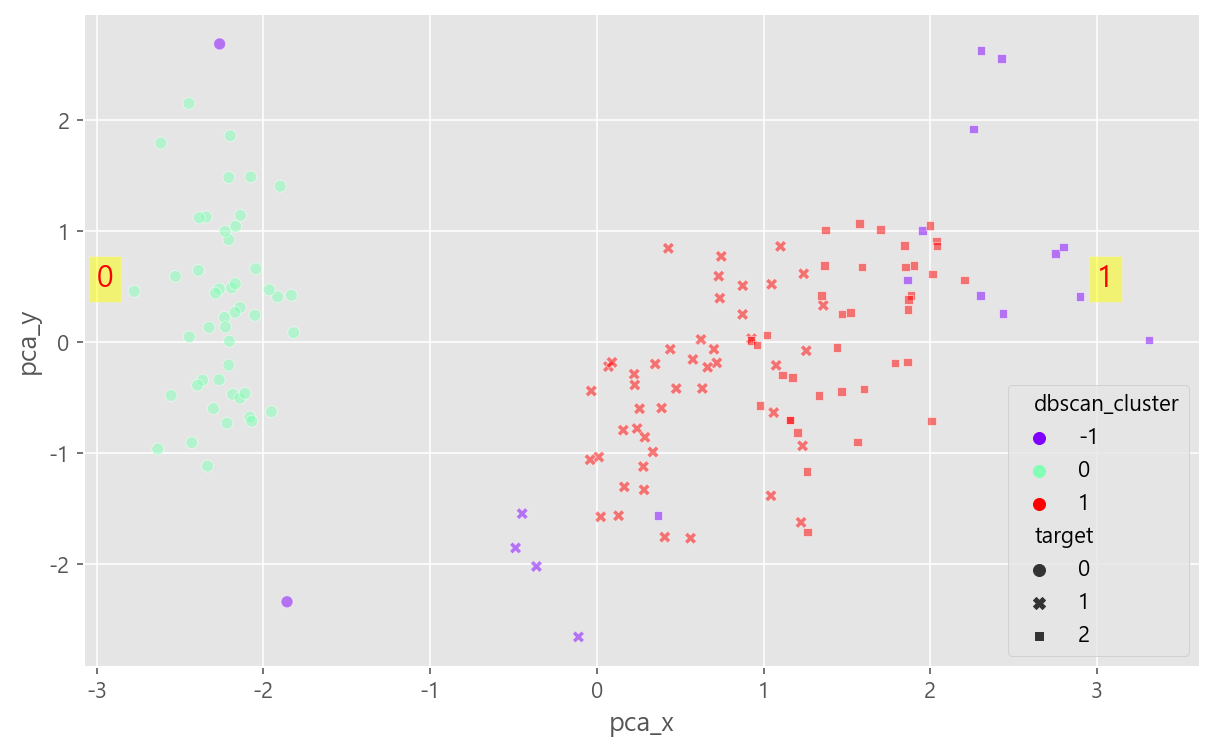

In [69]:
sns.color_palette("Paired")
sns.scatterplot(x='pca_x', y='pca_y', data=iris_df, hue='dbscan_cluster', \
                style='target', palette='rainbow', alpha=0.5 )

#그래프 위에 글자 표시
plt.text(x=-3,
         y=0.5,
         s='0',
         fontdict=dict(color='red',size=15),
         bbox=dict(facecolor='yellow',alpha=0.5))


plt.text(x=3,
         y=0.5,
         s='1',
         fontdict=dict(color='red',size=15),
         bbox=dict(facecolor='yellow',alpha=0.5))


##  eps의 크기를 증가 한 후 노이즈 확인

In [70]:
from sklearn.cluster import DBSCAN

# dbscan = DBSCAN(eps=0.6, min_samples=8, metric='euclidean')
dbscan = DBSCAN(eps=0.8, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

iris_df['dbscan_cluster'] = dbscan_labels

iris_result = iris_df.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: dbscan_cluster, dtype: int64


Text(3, 0.5, '1')

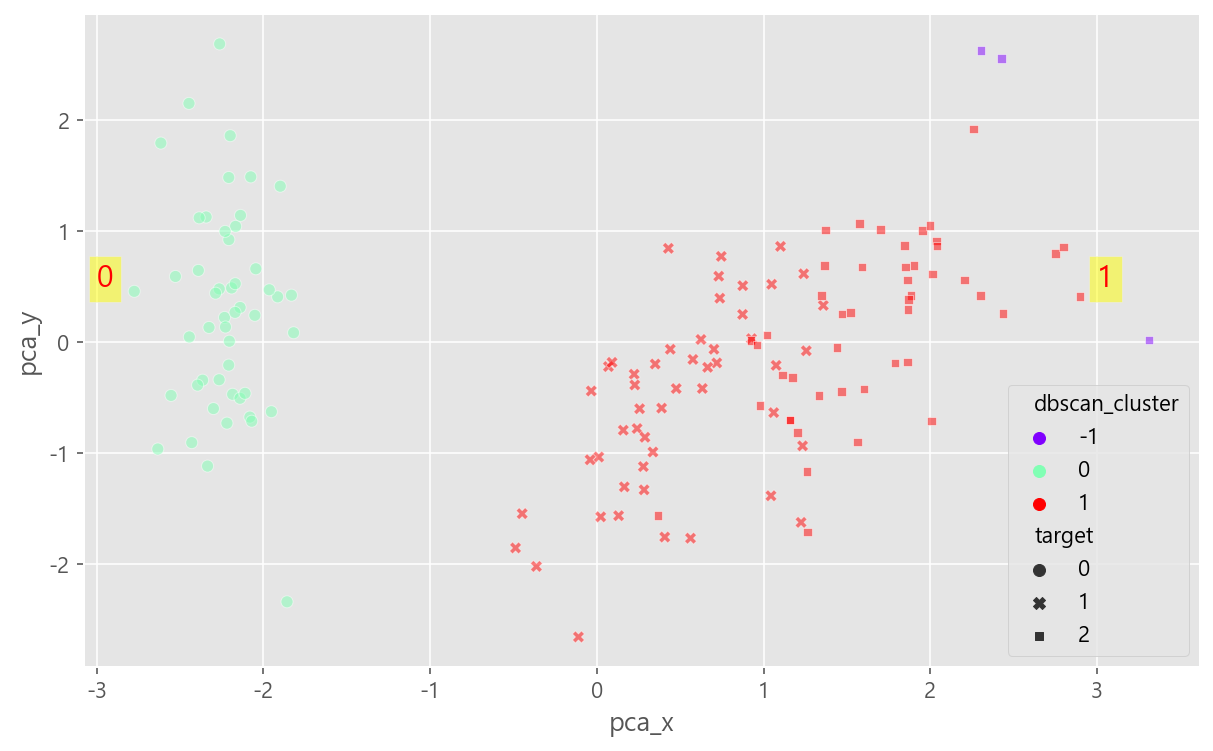

In [71]:
sns.color_palette("Paired")
sns.scatterplot(x='pca_x', y='pca_y', data=iris_df, hue='dbscan_cluster', \
                    style='target', palette='rainbow', alpha=0.5 )
plt.text(x=-3,
         y=0.5,
         s='0',
         fontdict=dict(color='red',size=15),
         bbox=dict(facecolor='yellow',alpha=0.5))


plt.text(x=3,
         y=0.5,
         s='1',
         fontdict=dict(color='red',size=15),
         bbox=dict(facecolor='yellow',alpha=0.5))

## min_samples의 크기를 증가 후 노이즈 확인

- min_samples 값을 늘리면 노이즈는 증가한다

In [72]:
from sklearn.cluster import DBSCAN

# dbscan = DBSCAN(eps=0.6, min_samples=8, metric='euclidean')
dbscan = DBSCAN(eps=0.6, min_samples=16, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

iris_df['dbscan_cluster'] = dbscan_labels

iris_result = iris_df.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                48
        -1                 2
1        1                44
        -1                 6
2        1                36
        -1                14
Name: dbscan_cluster, dtype: int64


Text(3, 0.5, '1')

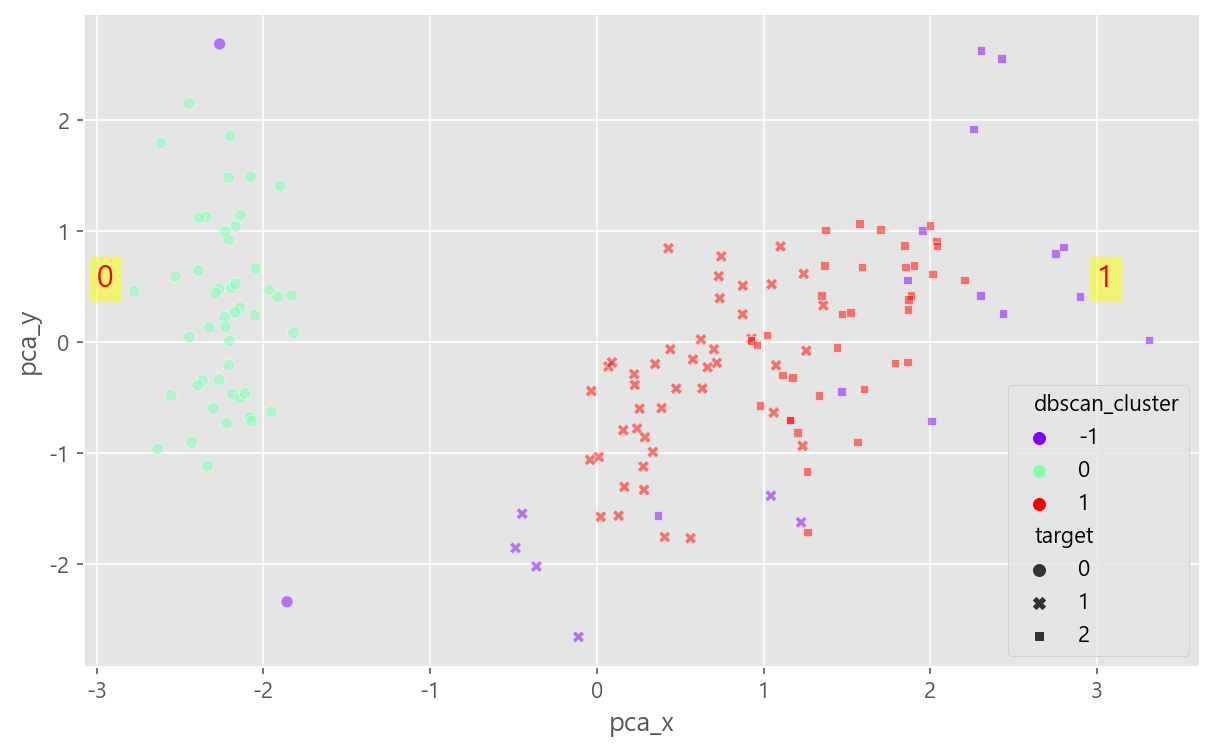

In [73]:
sns.color_palette("Paired")
sns.scatterplot(x='pca_x', y='pca_y', data=iris_df, hue='dbscan_cluster', \
                    style='target', palette='rainbow', alpha=0.5 )

plt.text(x=-3,
         y=0.5,
         s='0',
         fontdict=dict(color='red',size=15),
         bbox=dict(facecolor='yellow',alpha=0.5))


plt.text(x=3,
         y=0.5,
         s='1',
         fontdict=dict(color='red',size=15),
         bbox=dict(facecolor='yellow',alpha=0.5))

## DBSCAN 적용 – make_circles() 데이터 세트

In [74]:
#샘플 데이터셋 make_circles -> 타원형태
from sklearn.datasets import make_circles

#factor 값이 늘어나면 바깥원과의 거리가 가까워짐
X, y = make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0, factor=0.5)
# X, y = make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0, factor=0.7)

cluster_df = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
cluster_df['target'] = y

cluster_df.sample(3)

,ftr1,ftr2,target
502,-0.517905,0.183500,1
938,0.903620,0.329718,0
536,0.961875,-0.376690,0


<AxesSubplot:xlabel='ftr1', ylabel='ftr2'>

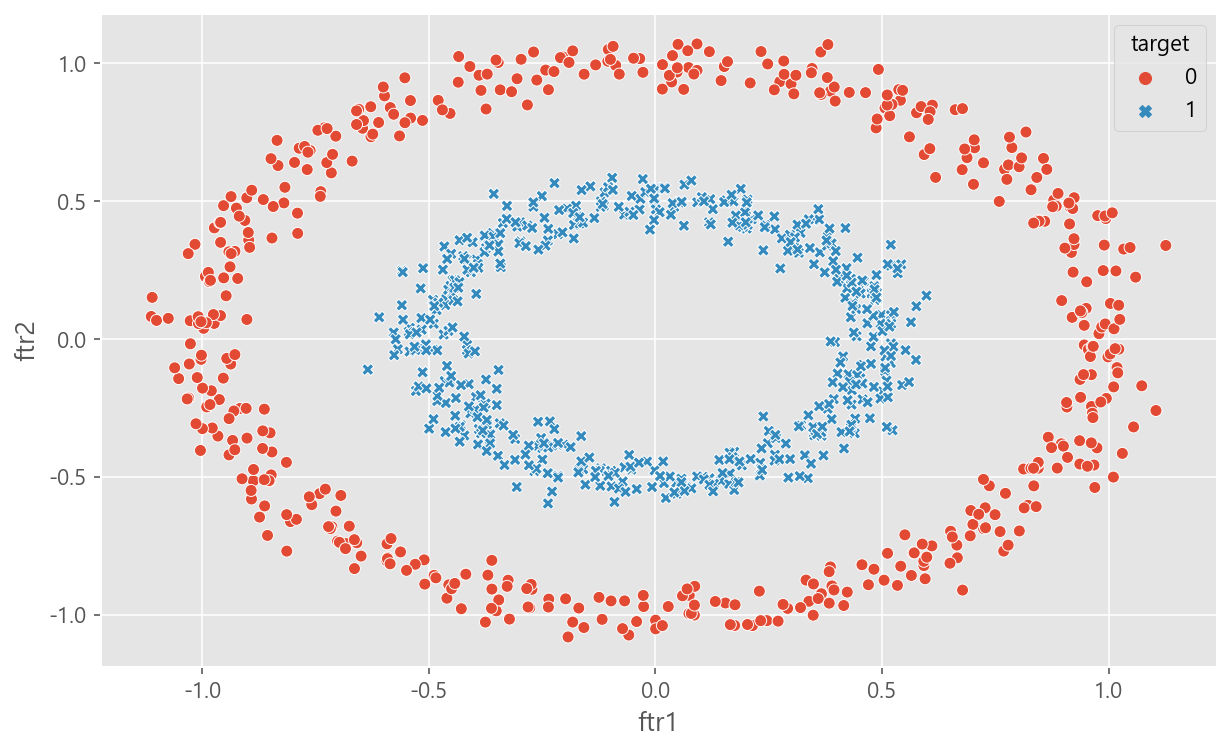

In [75]:
sns.color_palette("GnBu")
sns.scatterplot(x='ftr1', y='ftr2', data=cluster_df, hue='target', \
                    style='target' )


In [76]:
# from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X)
cluster_df['dbscan_cluster'] = dbscan_labels

cluster_df.sample(5)

,ftr1,ftr2,target,dbscan_cluster
422,-0.428216,-0.978272,0,1
937,-0.232742,-0.298697,1,0
628,-0.342150,0.383983,1,0
400,-0.269101,0.479676,1,0
987,-0.441258,-0.324820,1,0


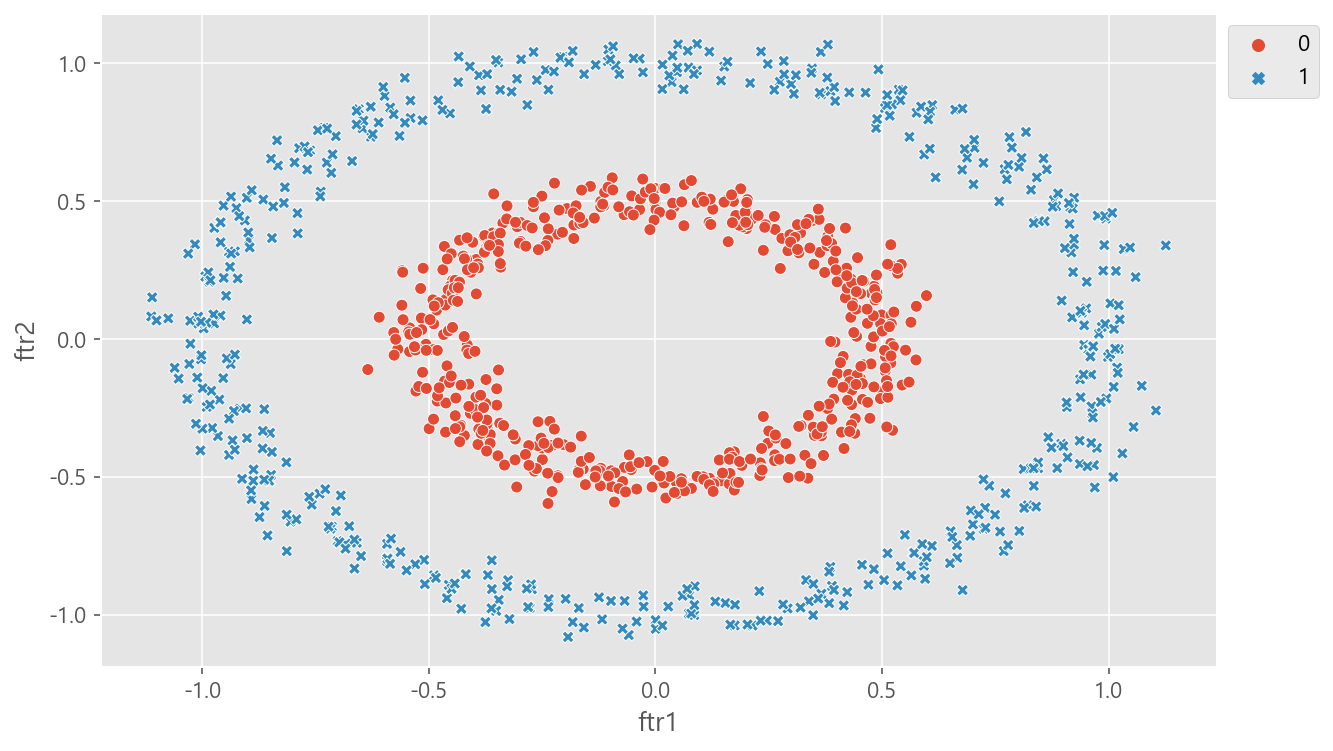

In [77]:
# hue='dbscan_cluster', style='dbscan_cluster'
sns.color_palette("GnBu")
sns.scatterplot(x='ftr1', y='ftr2', data=cluster_df, hue='dbscan_cluster', \
                    style='dbscan_cluster' )
plt.legend(loc = 2, bbox_to_anchor = (1,1))

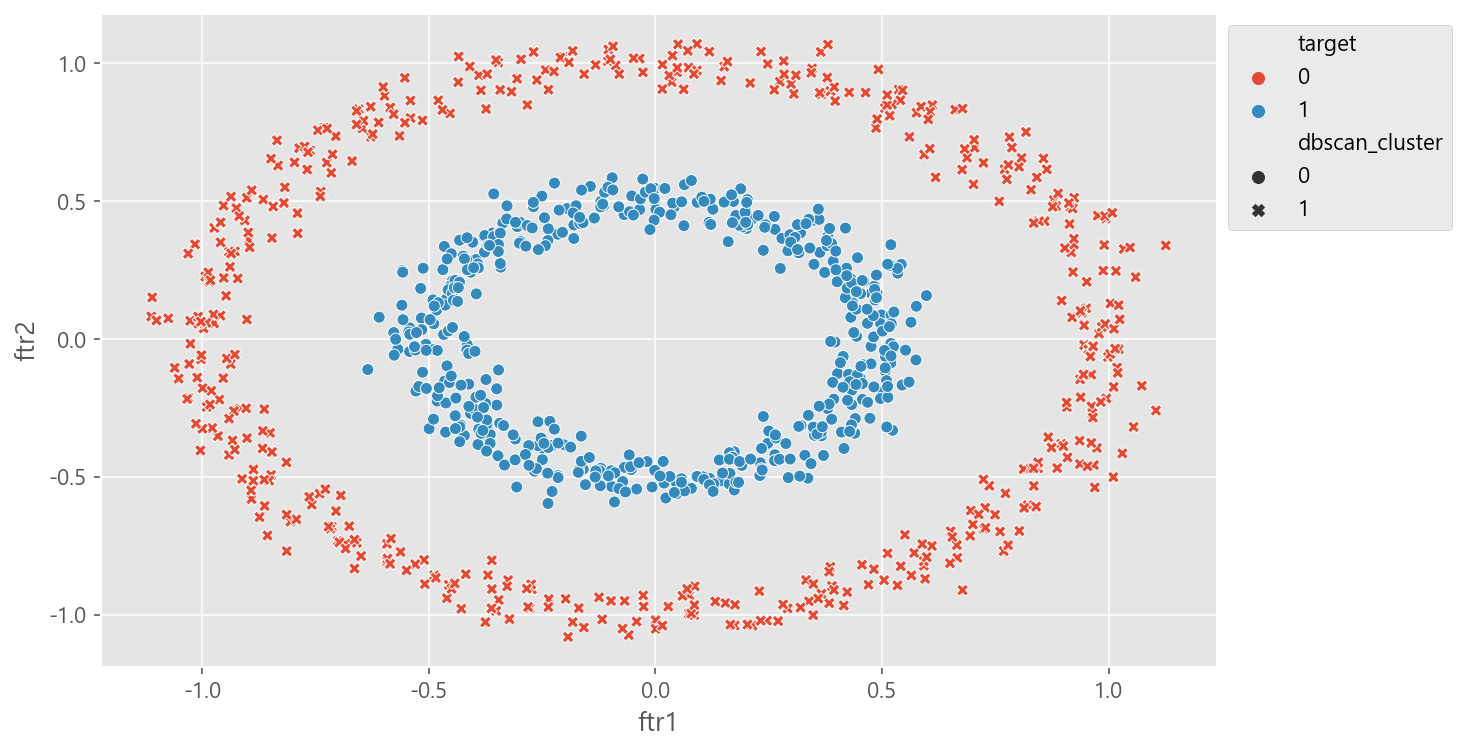

In [78]:
# hue='target', style='dbscan_cluster'
sns.color_palette("GnBu")
sns.scatterplot(x='ftr1', y='ftr2', data=cluster_df, hue='target', \
                    style='dbscan_cluster' )
plt.legend(loc = 2, bbox_to_anchor = (1,1))

## KMeans 모델과 비교

In [79]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=0)
kmeans_labels = kmeans.fit_predict(X)
cluster_df['kmeans_cluster'] = kmeans_labels

cluster_df.sample(5)

,ftr1,ftr2,target,dbscan_cluster,kmeans_cluster
765,-0.557524,0.242385,1,0,1
128,0.371014,-0.422299,1,0,0
322,0.350956,-0.349339,1,0,0
346,0.047900,0.968148,0,1,1
19,0.506698,0.838039,0,1,1


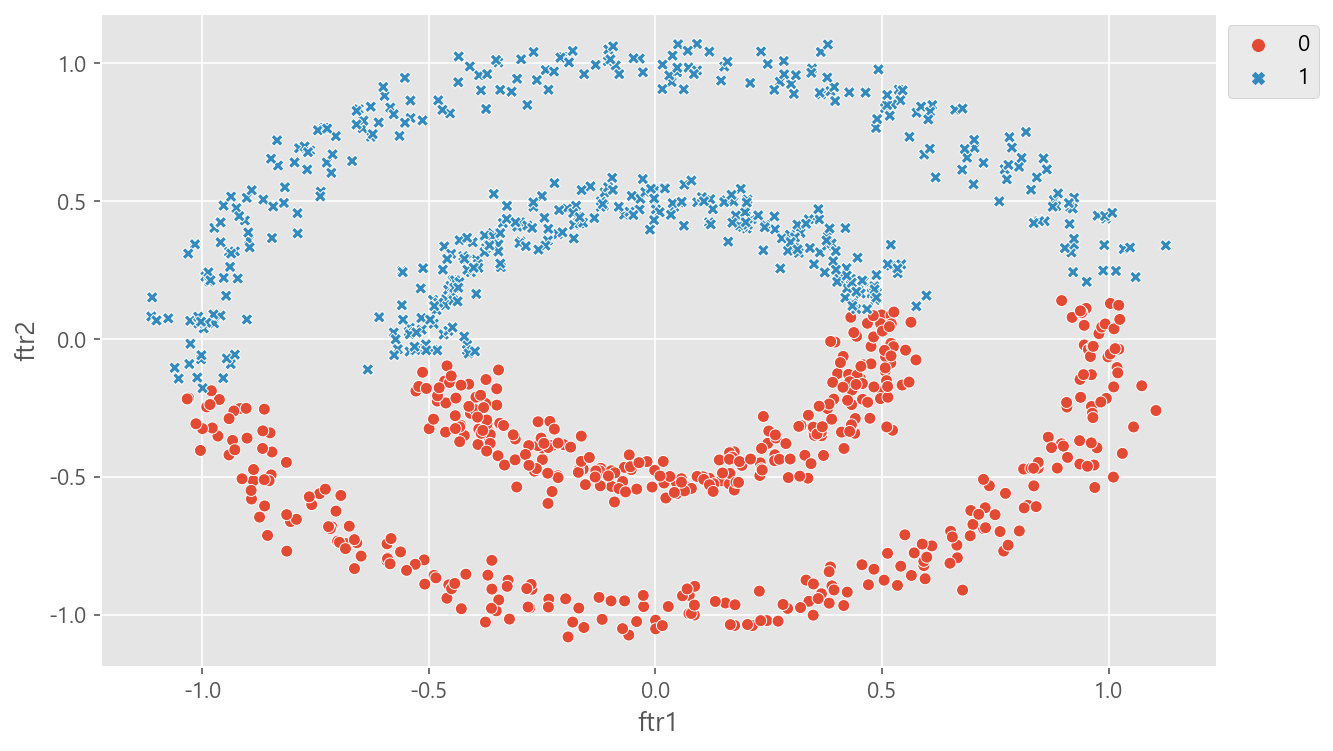

In [80]:
sns.color_palette("GnBu")
sns.scatterplot(x='ftr1', y='ftr2', data=cluster_df, hue='kmeans_cluster', \
                    style='kmeans_cluster' )
plt.legend(loc = 2, bbox_to_anchor = (1,1))

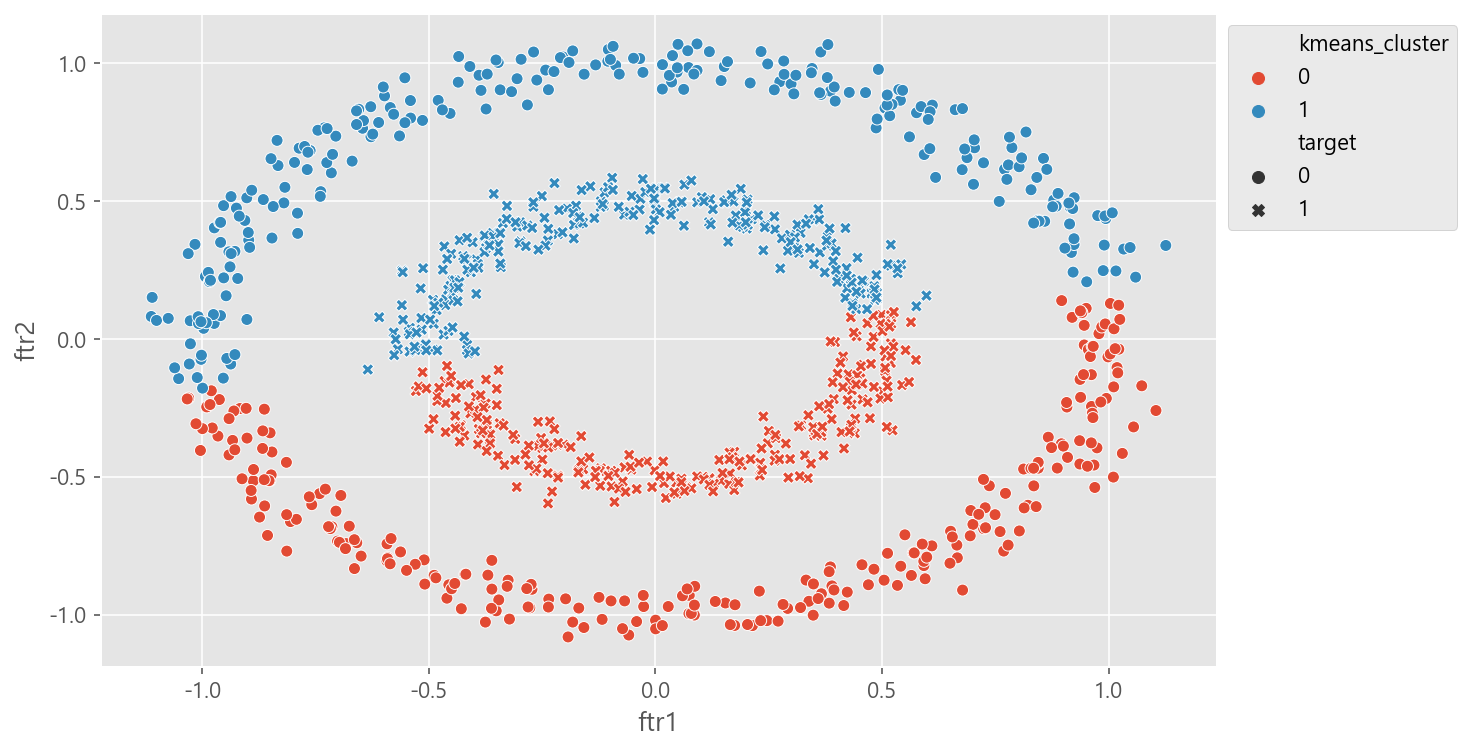

In [81]:
#kmeans cluster + target
sns.color_palette("GnBu")
sns.scatterplot(x='ftr1', y='ftr2', data=cluster_df, hue='kmeans_cluster', \
                    style='target' )
plt.legend(loc = 2, bbox_to_anchor = (1,1))